In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder


In [71]:
Genetics_dataset = pd.read_csv("train.csv")
Genetics_dataset_test = pd.read_csv("test.csv")
df = Genetics_dataset.copy()
df2 = Genetics_dataset_test.copy()

In [72]:
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [73]:
df.tail()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [74]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [75]:
df.shape

(22083, 45)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [77]:

print(df.isna().sum())

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

Dropping "Place of birth" and "Location of Institute" since they don't show any relevant information 

In [78]:
df.drop(["Patient Id", "Patient First Name", "Family Name", "Father's name", "Parental consent", "Place of birth", "Location of Institute", "Institute Name"], inplace=True, axis=1)

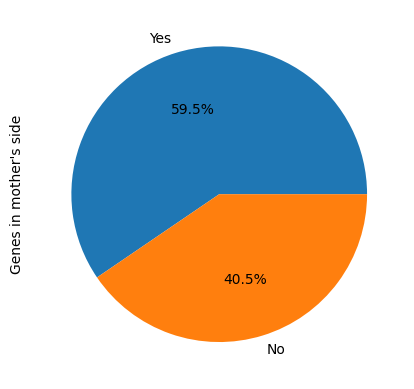

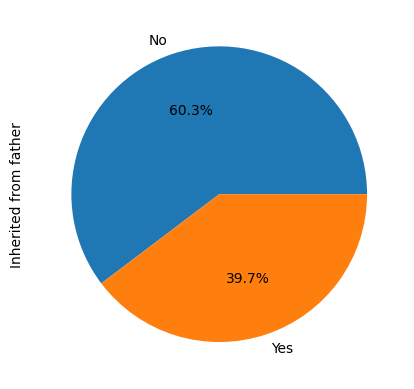

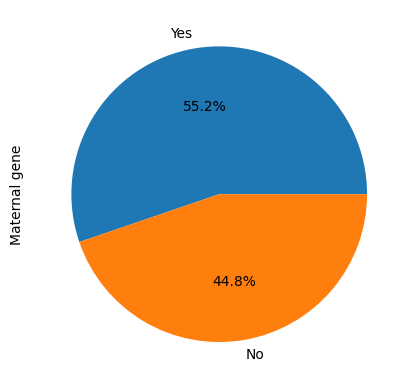

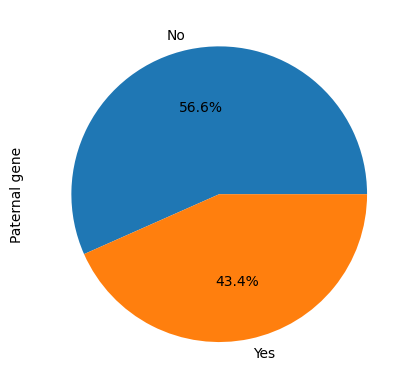

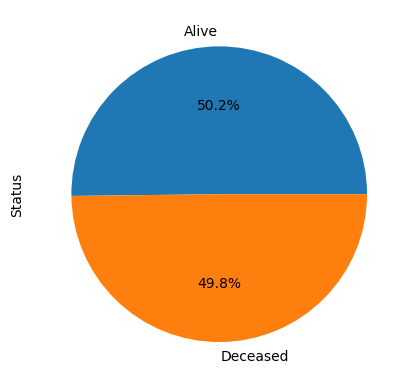

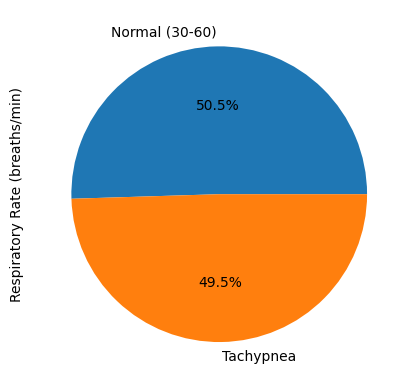

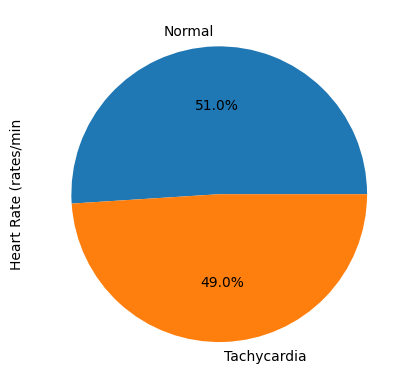

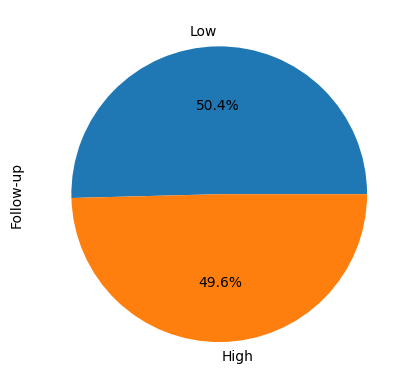

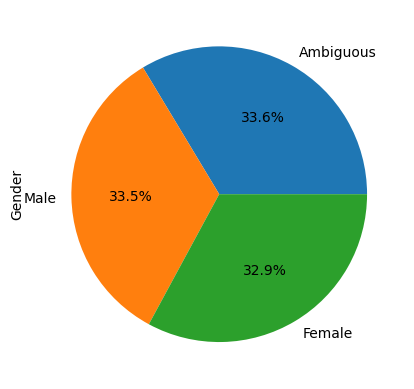

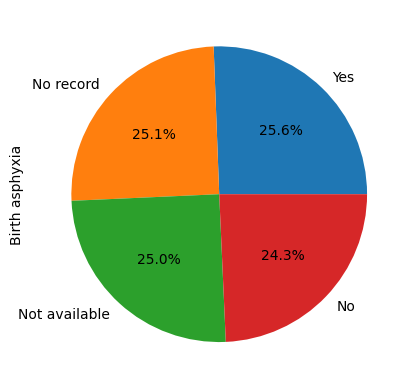

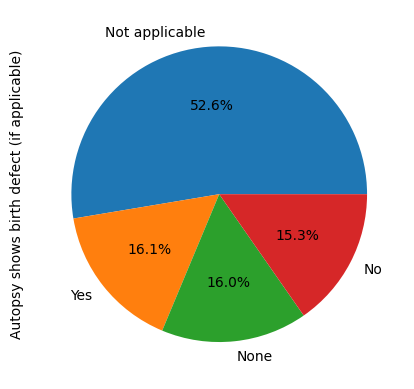

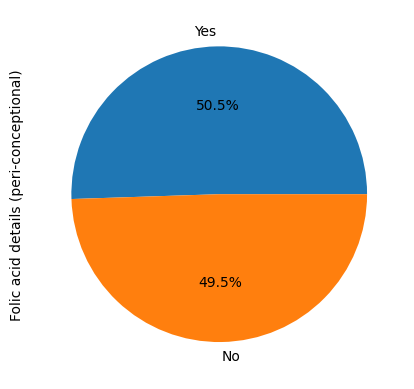

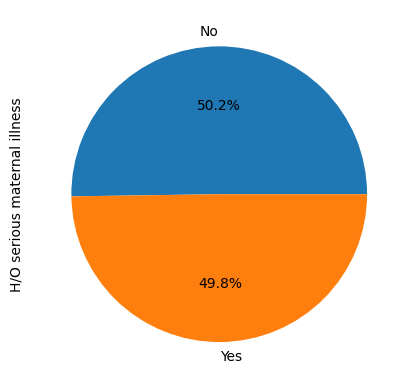

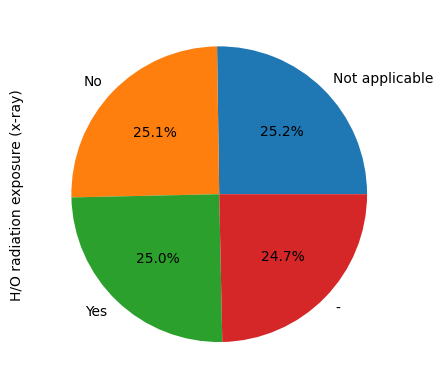

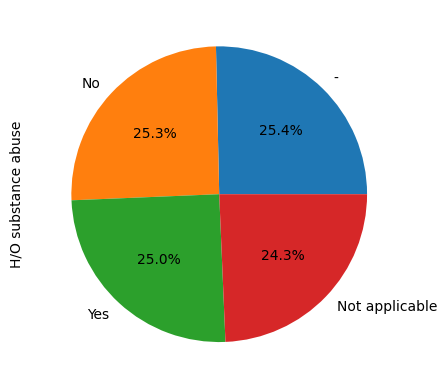

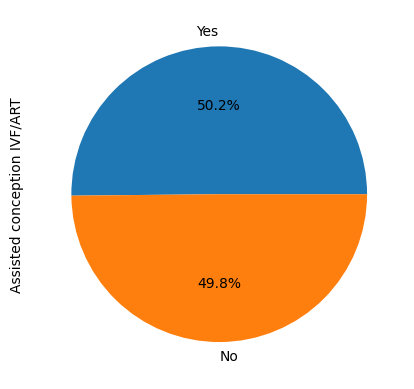

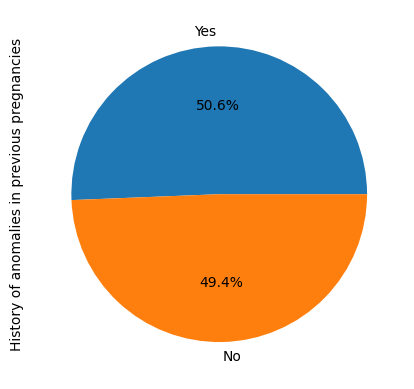

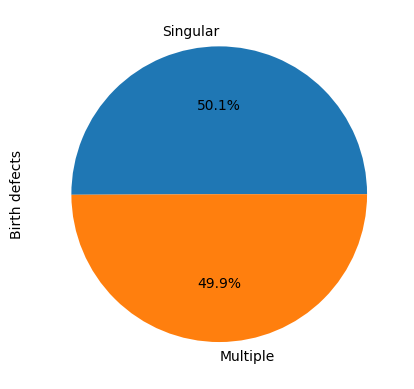

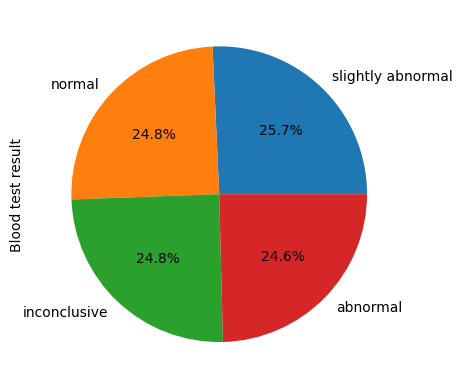

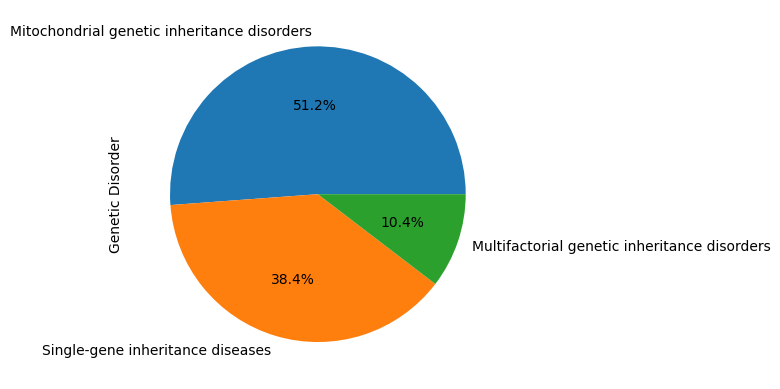

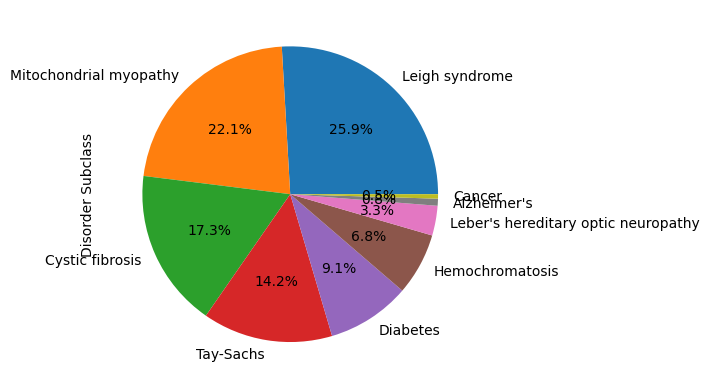

In [79]:
for c in df.columns:
    if df[c].dtype == object:
        df[c].value_counts().plot.pie(autopct="%1.1f%%")
        plt.show()


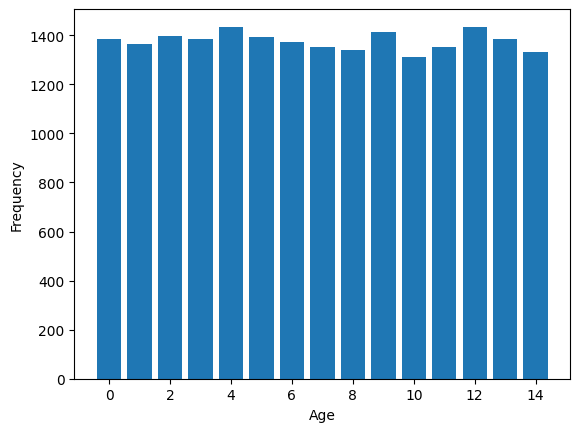

In [80]:
categories = df["Patient Age"].value_counts().index
counts = df["Patient Age"].value_counts().values
plt.bar(categories, counts)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

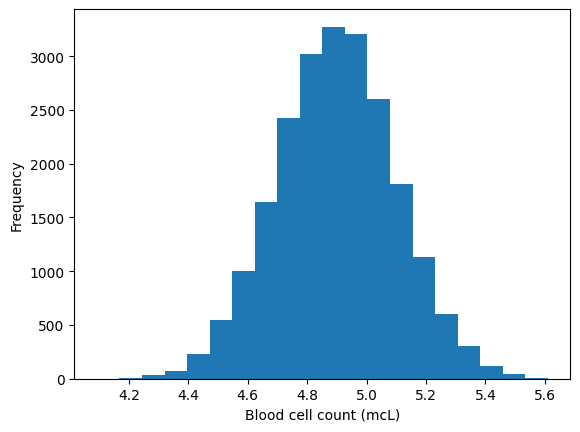

In [81]:
plt.hist(df["Blood cell count (mcL)"], bins=20)
plt.xlabel("Blood cell count (mcL)")
plt.ylabel("Frequency")
plt.show()

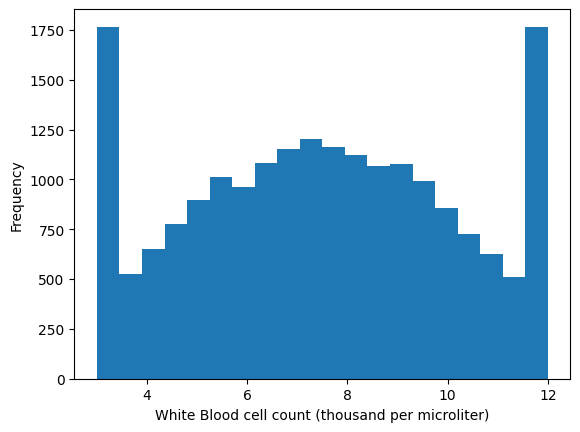

In [82]:
plt.hist(df["White Blood cell count (thousand per microliter)"], bins=20)
plt.xlabel("White Blood cell count (thousand per microliter)")
plt.ylabel("Frequency")
plt.show()

In [83]:
print(df["Birth asphyxia"].value_counts())

Yes              5106
No record        5008
Not available    4986
No               4844
Name: Birth asphyxia, dtype: int64


In [84]:
df["Birth asphyxia"] = df["Birth asphyxia"].replace("No record",np.NaN)
df["Birth asphyxia"] = df["Birth asphyxia"].replace("Not available",np.NaN)

In [85]:
df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)

In [86]:
df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("-",np.NaN)

In [87]:
df["H/O substance abuse"] = df["H/O substance abuse"].replace("Not applicable",np.NaN)
df["H/O substance abuse"] = df["H/O substance abuse"].replace("-",np.NaN)

In [88]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


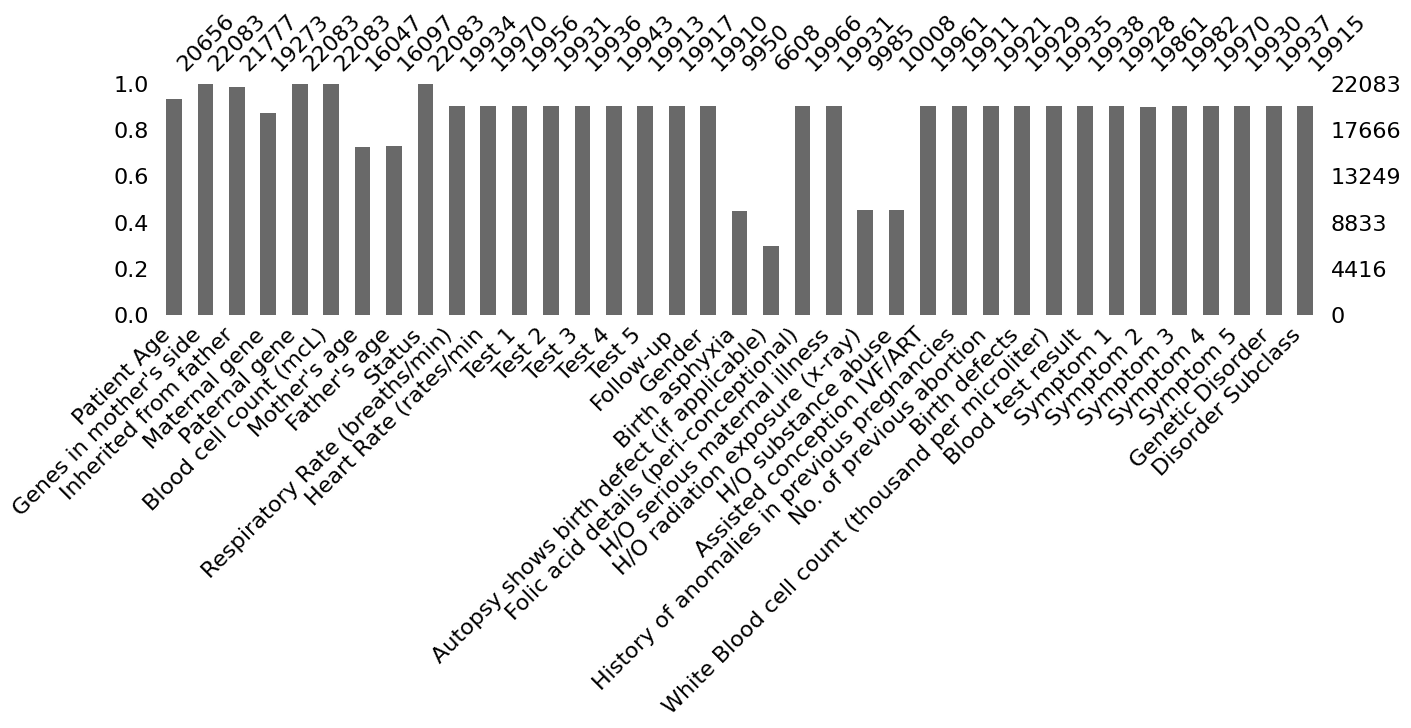

In [89]:
msno.bar(df,figsize=(15,3))
plt.show()

In [90]:
df.drop(["Birth asphyxia", "Autopsy shows birth defect (if applicable)"], inplace=True, axis=1)

In [91]:
df["Patient Age"].fillna(str(df["Patient Age"].mode().values[0]),inplace=True)
df["Inherited from father"].fillna(str(df["Inherited from father"].mode().values[0]),inplace=True)
df["Maternal gene"].fillna(str(df["Maternal gene"].mode().values[0]),inplace=True)
df["Mother's age"].fillna(df["Mother's age"].mode().values[0],inplace=True)
df["Father's age"].fillna(df["Father's age"].mode().values[0],inplace=True)
df["Test 1"].fillna(df["Test 1"].mode().values[0],inplace=True)
df["Test 2"].fillna(df["Test 2"].mode().values[0],inplace=True)
df["Test 3"].fillna(df["Test 3"].mode().values[0],inplace=True)
df["Test 4"].fillna(df["Test 4"].mode().values[0],inplace=True)
df["Test 5"].fillna(df["Test 5"].mode().values[0],inplace=True)
df["Respiratory Rate (breaths/min)"].fillna(str(df["Respiratory Rate (breaths/min)"].mode().values[0]),inplace=True)
df["Heart Rate (rates/min"].fillna(str(df["Heart Rate (rates/min"].mode().values[0]),inplace=True)
df["Follow-up"].fillna(str(df["Follow-up"].mode().values[0]),inplace=True)
df["Gender"].fillna(str(df["Gender"].mode().values[0]),inplace=True)
df["Folic acid details (peri-conceptional)"].fillna(str(df["Folic acid details (peri-conceptional)"].mode().values[0]),inplace=True)
df["H/O serious maternal illness"].fillna(str(df["H/O serious maternal illness"].mode().values[0]),inplace=True)
df["H/O radiation exposure (x-ray)"].fillna(str(df["H/O radiation exposure (x-ray)"].mode().values[0]),inplace=True)
df["H/O substance abuse"].fillna(str(df["H/O substance abuse"].mode().values[0]),inplace=True)
df["Assisted conception IVF/ART"].fillna(str(df["Assisted conception IVF/ART"].mode().values[0]),inplace=True)
df["Symptom 1"].fillna(df["Symptom 1"].mode().values[0],inplace=True)
df["Symptom 2"].fillna(df["Symptom 2"].mode().values[0],inplace=True)
df["Symptom 3"].fillna(df["Symptom 3"].mode().values[0],inplace=True)
df["Symptom 4"].fillna(df["Symptom 4"].mode().values[0],inplace=True)
df["Symptom 5"].fillna(df["Symptom 5"].mode().values[0],inplace=True)
df["History of anomalies in previous pregnancies"].fillna(str(df["History of anomalies in previous pregnancies"].mode().values[0]),inplace=True)
df["No. of previous abortion"].fillna(df["No. of previous abortion"].mode().values[0],inplace=True)
df["Birth defects"].fillna(str(df["Birth defects"].mode().values[0]),inplace=True)
df["White Blood cell count (thousand per microliter)"].fillna(df["White Blood cell count (thousand per microliter)"].median(),inplace=True)
df["Blood test result"].fillna(str(df["Blood test result"].mode().values[0]),inplace=True)
df["Genetic Disorder"].fillna(str(df["Genetic Disorder"].mode().values[0]),inplace=True)
df["Disorder Subclass"].fillna(str(df["Disorder Subclass"].mode().values[0]),inplace=True)

In [92]:
print("NAN VALUES:\n")
print(df.isna().sum())

NAN VALUES:

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
Follow-up                                           0
Gender                                              0
Folic acid deta

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             22083 non-null  object 
 3   Maternal gene                                     22083 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      22083 non-null  float64
 7   Father's age                                      22083 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [94]:
df.to_csv("train_processed.csv")

In [95]:
encode_data = df.copy()
encoder = LabelEncoder()

encode_data["Genes in mother's side"] = encoder.fit_transform(encode_data["Genes in mother's side"])
encode_data["Inherited from father"] = encoder.fit_transform(encode_data["Inherited from father"])
encode_data["Maternal gene"] = encoder.fit_transform(encode_data["Maternal gene"])
encode_data["Paternal gene"] = encoder.fit_transform(encode_data["Paternal gene"])
encode_data["Mother's age"] = encoder.fit_transform(encode_data["Mother's age"])
encode_data["Paternal gene"] = encoder.fit_transform(encode_data["Paternal gene"])
encode_data["Status"] = encoder.fit_transform(encode_data["Status"])
encode_data["Respiratory Rate (breaths/min)"] = encoder.fit_transform(encode_data["Respiratory Rate (breaths/min)"])
encode_data["Heart Rate (rates/min"] = encoder.fit_transform(encode_data["Heart Rate (rates/min"])
encode_data["Follow-up"] = encoder.fit_transform(encode_data["Follow-up"])
encode_data["Gender"] = encoder.fit_transform(encode_data["Gender"])
encode_data["Folic acid details (peri-conceptional)"] = encoder.fit_transform(encode_data["Folic acid details (peri-conceptional)"])
encode_data["H/O serious maternal illness"] = encoder.fit_transform(encode_data["H/O serious maternal illness"])
encode_data["H/O radiation exposure (x-ray)"] = encoder.fit_transform(encode_data["H/O radiation exposure (x-ray)"])
encode_data["H/O substance abuse"] = encoder.fit_transform(encode_data["H/O substance abuse"])
encode_data["Assisted conception IVF/ART"] = encoder.fit_transform(encode_data["Assisted conception IVF/ART"])
encode_data["History of anomalies in previous pregnancies"] = encoder.fit_transform(encode_data["History of anomalies in previous pregnancies"])
encode_data["No. of previous abortion"] = encoder.fit_transform(encode_data["No. of previous abortion"])
encode_data["Birth defects"] = encoder.fit_transform(encode_data["Birth defects"])
encode_data["Blood test result"] = encoder.fit_transform(encode_data["Blood test result"])
encode_data["Genetic Disorder"] = encoder.fit_transform(encode_data["Genetic Disorder"])
encode_data["Disorder Subclass"] = encoder.fit_transform(encode_data["Disorder Subclass"])

In [96]:
encode_data = encode_data.astype("float32")
print(encode_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float32
 1   Genes in mother's side                            22083 non-null  float32
 2   Inherited from father                             22083 non-null  float32
 3   Maternal gene                                     22083 non-null  float32
 4   Paternal gene                                     22083 non-null  float32
 5   Blood cell count (mcL)                            22083 non-null  float32
 6   Mother's age                                      22083 non-null  float32
 7   Father's age                                      22083 non-null  float32
 8   Status                                            22083 non-null  float32
 9   Respiratory Rate 

In [97]:
encode_data.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,1.0,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,0.0,5.522560,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,1.0,7.477132,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,1.0,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,14.0,20.0,0.0,1.0,...,0.0,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [98]:
encode_data.to_csv("train_processed_encoded.csv")

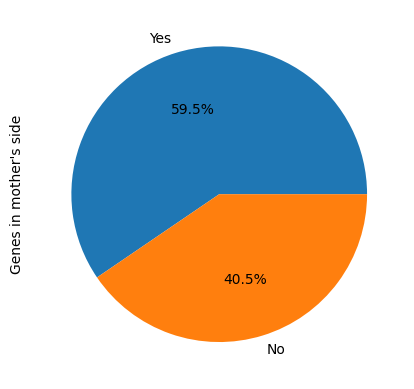

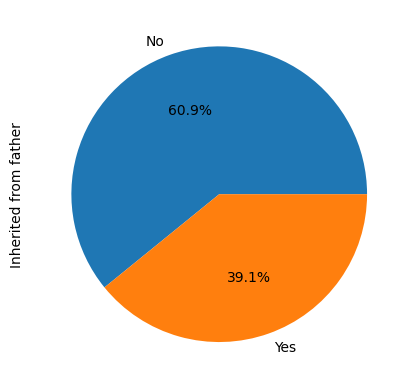

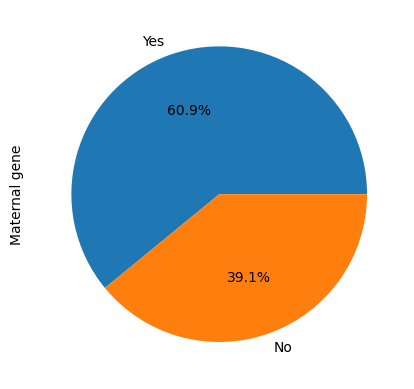

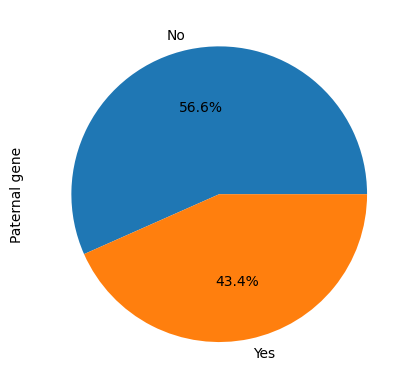

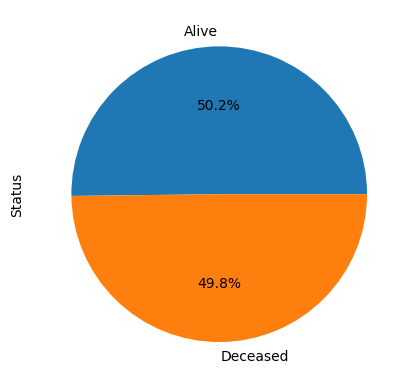

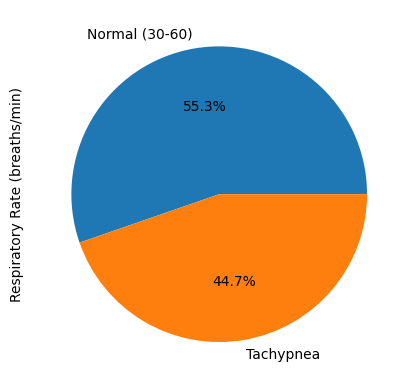

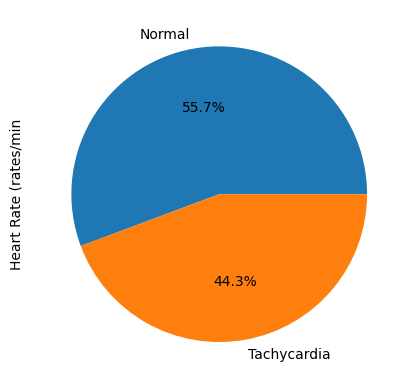

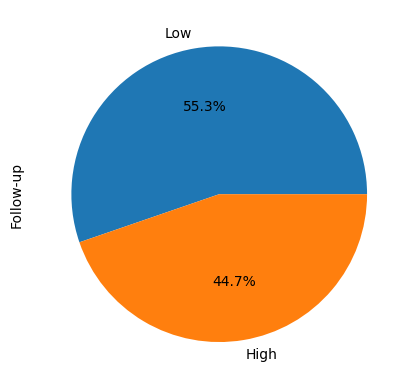

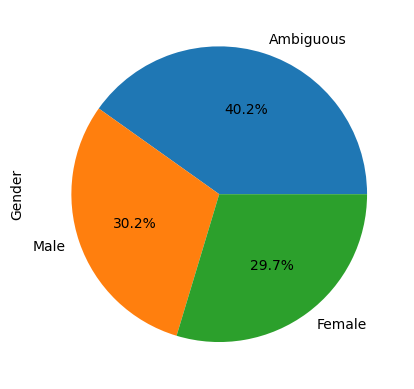

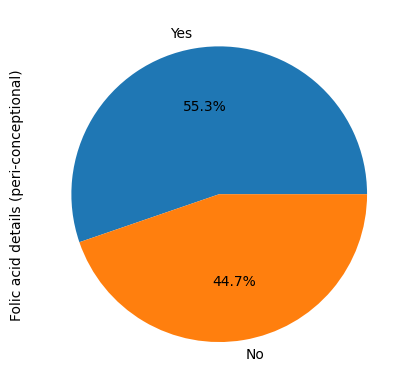

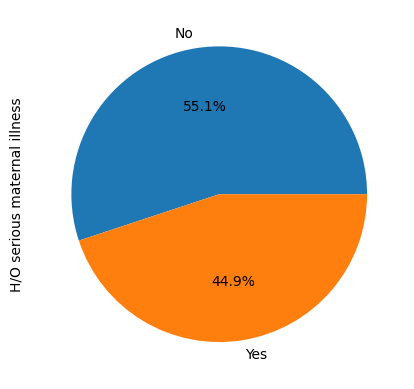

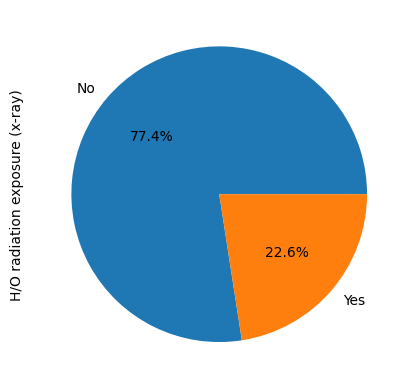

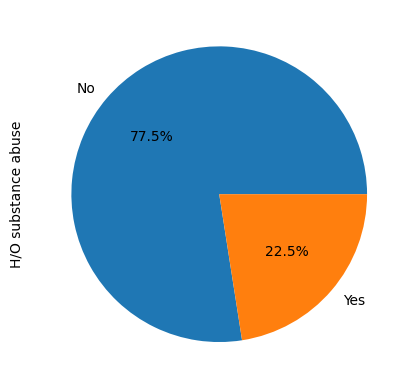

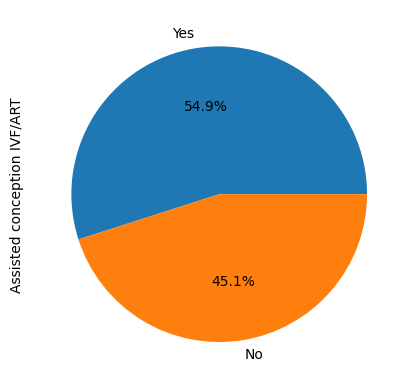

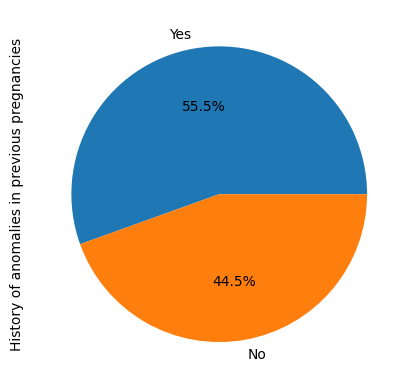

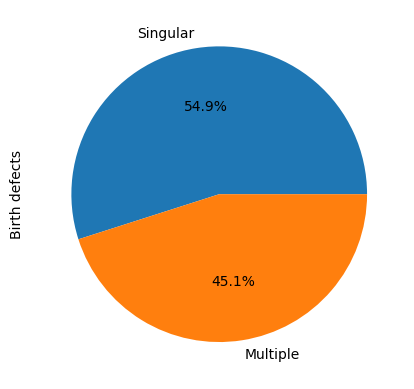

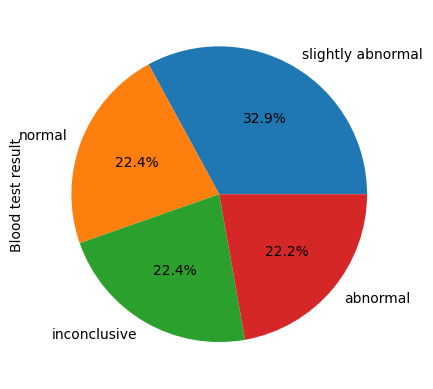

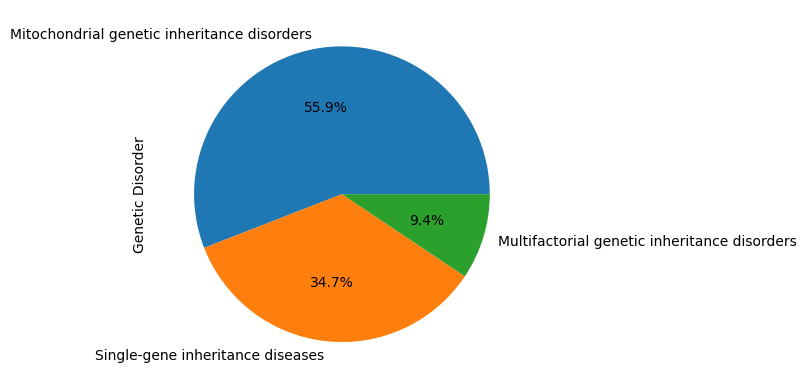

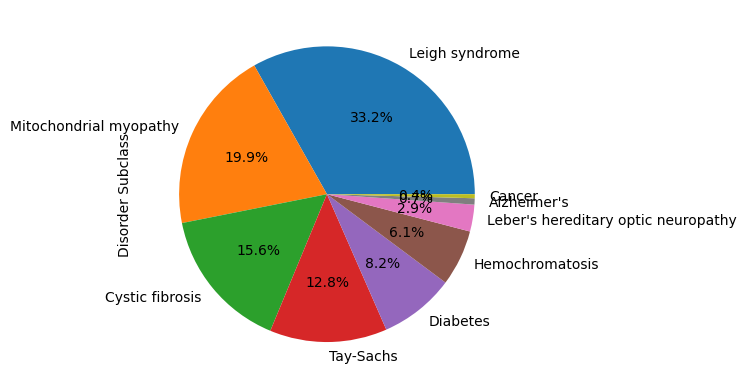

In [99]:
for c in df.columns:
    if df[c].dtype == object and df[c].name != "Patient Age":
        df[c].value_counts().plot.pie(autopct="%1.1f%%")
        plt.show()

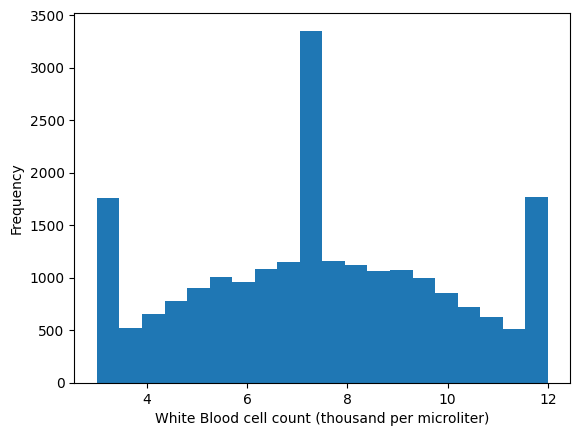

In [100]:
plt.hist(df["White Blood cell count (thousand per microliter)"], bins=20)
plt.xlabel("White Blood cell count (thousand per microliter)")
plt.ylabel("Frequency")
plt.show()

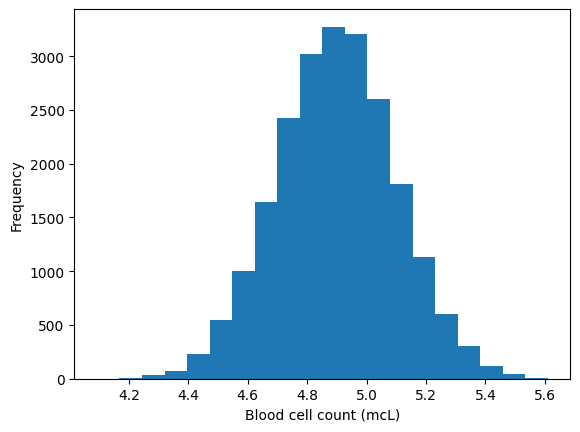

In [101]:
plt.hist(df["Blood cell count (mcL)"], bins=20)
plt.xlabel("Blood cell count (mcL)")
plt.ylabel("Frequency")
plt.show()

TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

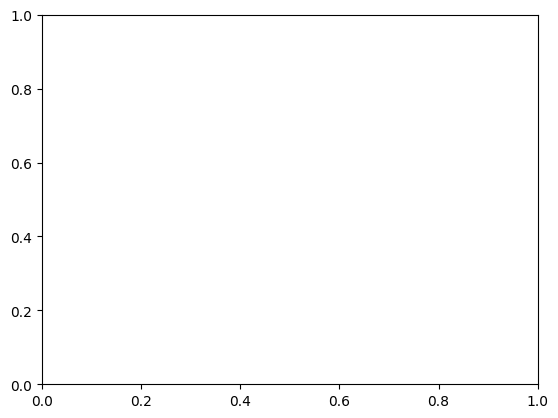

In [102]:
categories = df["Patient Age"].value_counts().index
counts = df["Patient Age"].value_counts().values
plt.bar(categories, counts)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()